# Introduction to Differential Equations for Neuroscientists

This notebook introduces the basic concepts of differential equations, focusing on numerical solutions to them, and hopefully will get you ready to apply them in neuroscience — including the Hodgkin-Huxley model. 


## Module 1: What Is a Differential Equation?

A **differential equation** is a mathematical expression that describes how something changes over time (or space). A differential equation contains the derivative of one or more of the dependent variables with respect to one or more of the independent variables. In neuroscience, we often use differential equations to describe how a neuron's membrane voltage changes in response to currents, ion channel states, or synaptic inputs.

In general, a differential equation relates a variable (like voltage ( V )) to its rate of change (like $\frac{dV}{dt}$).

---

### Example: Harmonic Oscillator

Imagine a small object (like a bead) on a frictionless track, attached to a spring. When you pull it to one side and release it, it oscillates back and forth.  

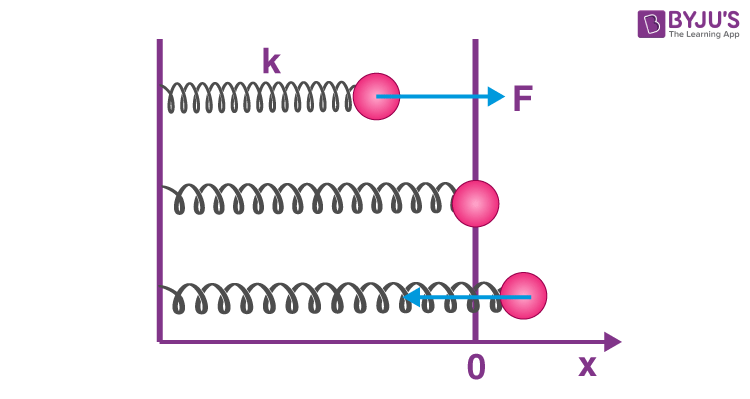

This motion can be described by a **second-order ordinary differential equation (ODE)**:
$$
\frac{d^2x}{dt^2} = -\frac{k}{m} x
$$

Where:
- $x(t)$: position of the bead at time $t$  
- $k$: spring constant (restoring force)  
- $m$: mass  
- $\frac{d^2x}{dt^2}$: acceleration (rate of change of velocity)  

This says: *The further the object is from center, the stronger the pull back toward zero* — classic negative feedback.

Let’s simulate this numerically and watch it oscillate.


### Analytical solution to the harmonic oscillator 

To solve the ode analytically, we need to find a function $x(t)$ such that its **second derivative** equals $-\frac{k}{m} x$.

---

### Step 1: Guess a Function (Method of Undetermined Coefficients)

We notice that the function $\sin(t)$ has the property that its second derivative is $-\sin(t)$. Same with $\cos(t)$.

So let’s **guess** a general solution of the form:

$$
x(t) = A \cos(\omega t) + B \sin(\omega t)
$$

where:
- $A$ and $B$ are constants determined by initial conditions
- $\omega$ is the angular frequency

Take two derivatives:

$$
\frac{dx}{dt} = -A \omega \sin(\omega t) + B \omega \cos(\omega t) \\  
$$  

$$
\frac{d^2x}{dt^2} = -A \omega^2 \cos(\omega t) - B \omega^2 \sin(\omega t)
$$

Now plug back into the original equation:

$$
\frac{d^2x}{dt^2} = -\omega^2 x(t)
$$

Compare this with the original:

$$
\frac{d^2x}{dt^2} = -\frac{k}{m} x(t)
$$

So we get:

$$
\omega^2 = \frac{k}{m} \Rightarrow \omega = \sqrt{\frac{k}{m}}
$$

That’s the natural frequency of the system!

---

### Step 2: Use Initial Conditions

Let’s say:
- $x(0) = x_0$ (initial position)
- $\frac{dx}{dt}(0) = v_0$ (initial velocity)

Apply these:

1. $x(0) = A \cdot \cos(0) + B \cdot \sin(0) = A \Rightarrow A = x_0$
2. $\frac{dx}{dt}(0) = -A \omega \cdot \sin(0) + B \omega \cdot \cos(0) = B \omega \Rightarrow B = \frac{v_0}{\omega}$

---

### Final Solution:

$$
x(t) = x_0 \cos(\omega t) + \frac{v_0}{\omega} \sin(\omega t)
$$

Where $\omega = \sqrt{\frac{k}{m}}$

This function tells us exactly where the object is at any time $t$, given its starting position and velocity.

---



## Module 2: Solving Differential Equations with the Euler Method

In practice, we often encounter differential equations that can’t easily be analytically solved. That’s where **numerical methods** come in.

One of the simplest ways to solve an ordinary differential equation (ODE) is the **Euler method**.

---

### Basic Idea

Suppose we have a first-order ODE:

$$
\frac{dx}{dt} = f(x, t)
$$

We don’t know the exact solution, but we do know the **rate of change** at every point.

Euler’s method uses this idea to approximate $x(t)$ step-by-step:

$$
x_{n+1} = x_n + f(x_n, t_n) \cdot \Delta t
$$

---

Think of it like this:

- Start at $x_0$ at time $t_0$
- Move a small step forward using the slope (derivative)
- Repeat!

Let’s apply this to the harmonic oscillator.


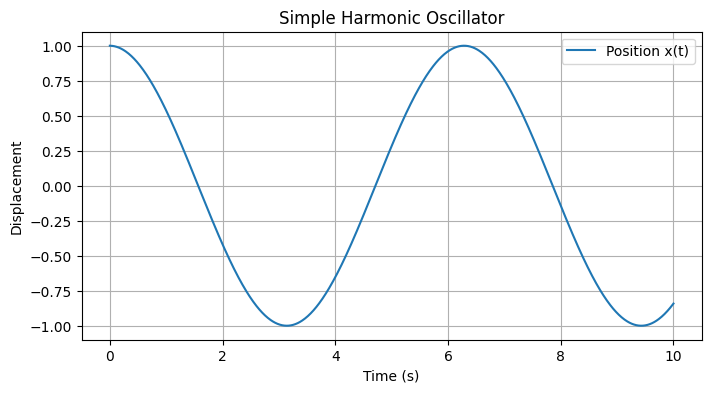

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
k = 1.0      # spring constant
m = 1.0      # mass
omega = np.sqrt(k/m)  # natural frequency
T = 10       # total simulation time (s)
dt = 0.01    # time step (s)
N = int(T / dt)
t = np.linspace(0, T, N)

# Initial conditions
x0 = 1.0     # initial position
v0 = 0.0     # initial velocity

x = np.zeros(N)
v = np.zeros(N)
x[0] = x0
v[0] = v0

# Euler method for second-order ODE
for i in range(1, N):
    a = -k/m * x[i-1]
    v[i] = v[i-1] + a * dt  #calculate first derivative (velocity)
    x[i] = x[i-1] + v[i] * dt #calculate second derivative (position)

plt.figure(figsize=(8, 4))
plt.plot(t, x, label='Position x(t)')
plt.title('Simple Harmonic Oscillator')
plt.xlabel('Time (s)')
plt.ylabel('Displacement')
plt.grid(True)
plt.legend()
plt.show()


> 📦 **Runge-Kutta: Smarter Steps Than Euler**

Euler’s method estimates the next value using the **slope at the beginning** of the interval:

$$
x_{n+1} = x_n + f(x_n, t_n) \cdot \Delta t
$$

But what if the slope **changes** during that interval?

---

### Runge-Kutta 4th Order (RK4)

RK4 improves this by taking **several mini-slopes** and averaging them:

1. Estimate the slope at the **start** of the interval → $k_1$
2. Estimate the slope at the **midpoint** (using $k_1$) → $k_2$
3. Do it again using $k_2$ → $k_3$
4. Estimate slope at the **end** of the interval (using $k_3$) → $k_4$

Then combine them:

$$
x_{n+1} = x_n + \frac{1}{6} (k_1 + 2k_2 + 2k_3 + k_4)
$$

where:

- $k_1 = \Delta t \cdot f(x_n, t_n)$  
- $k_2 = \Delta t \cdot f(x_n + \frac{k_1}{2}, t_n + \frac{\Delta t}{2})$  
- $k_3 = \Delta t \cdot f(x_n + \frac{k_2}{2}, t_n + \frac{\Delta t}{2})$  
- $k_4 = \Delta t \cdot f(x_n + k_3, t_n + \Delta t)$

---

- **More accurate** than Euler even with a larger time step
- **Reduces error dramatically** (error ∝ $(\Delta t)^4$)
---


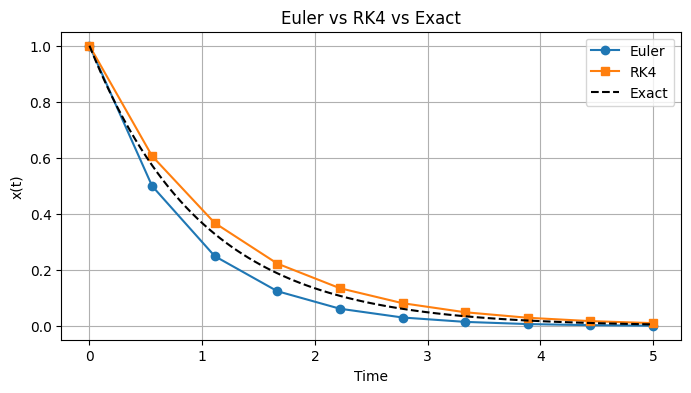

In [3]:
#compare Euler method with Runge-Kutta 4th order (RK4)
#use function x(t) = exp(-t) as an example
def f(t, x):
    return -x

# Parameters
dt = 0.5
T = 5
N = int(T / dt)
t = np.linspace(0, T, N)
x_euler = np.zeros(N)
x_rk = np.zeros(N)
x_euler[0] = 1
x_rk[0] = 1

# Euler method
for i in range(1, N):
    x_euler[i] = x_euler[i-1] + f(t[i-1], x_euler[i-1]) * dt

# Runge-Kutta 4
for i in range(1, N):
    x_n, t_n = x_rk[i-1], t[i-1]
    k1 = dt * f(t_n, x_n)
    k2 = dt * f(t_n + dt/2, x_n + k1/2)
    k3 = dt * f(t_n + dt/2, x_n + k2/2)
    k4 = dt * f(t_n + dt, x_n + k3)
    x_rk[i] = x_n + (k1 + 2*k2 + 2*k3 + k4) / 6

# True values
t_exact = np.linspace(0, T, 100)
x_exact = np.exp(-t_exact)

plt.figure(figsize=(8, 4))
plt.plot(t, x_euler, 'o-', label='Euler')
plt.plot(t, x_rk, 's-', label='RK4')
plt.plot(t_exact, x_exact, 'k--', label='Exact')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Euler vs RK4 vs Exact')
plt.legend()
plt.grid(True)
plt.show()


## Module 3: Partial Differential Equations & Dynamic Systems

So far, we’ve looked at **ordinary differential equations (ODEs)** — equations that describe how one variable changes over time.
But in many biological systems, variables change over **multiple factors**, like space and time, or dimensions of space — and that’s where **partial differential equations (PDEs)** come in.

---

### PDEs in Flow Fields

A **flow field** describes how something (like air, water, or neurons) moves through space over time.

One of the simplest PDEs is the **diffusion equation**:

$$
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}
$$

This describes how some quantity \( u(x,t) \) spreads out in space — like heat, or a chemical, or a voltage signal in a dendrite.

- $u(x,t)$ = quantity (e.g. voltage, neurotransmitter)
- $x$ = space
- $t$ = time
- $D$ = diffusion constant

---

### Why PDEs Matter in Neuroscience

- **Cable equation**: describes how voltage propagates in dendrites and axons (spatially extended neurons)
  
  $$
  \frac{\partial V}{\partial t} = D \frac{\partial^2 V}{\partial x^2} - \frac{1}{\tau}V + I(x, t)
  $$

<video controls src="SNAPT_CA1_slice.mp4" title="Title"></video>  
Optically triggered action potential wavefront in a mouse CA1 pyramidal cell, acute slice. From Adam Cohen  

- **Attractor dynamics**: describe how activity patterns move toward stable states in high-dimensional space (working memory, decision making)

---

### Attractors in Neural Systems

Neural populations often settle into stable states — these are called **attractors**.

- **Point attractor**: the system always ends up in one fixed pattern (e.g., a decision).
- **Limit cycle**: oscillatory behavior (e.g., central pattern generators).
- **Continuous attractor**: activity can drift smoothly (e.g., head direction cells, working memory in prefrontal cortex).  
Attractors are modeled using **dynamical systems**, which are often expressed as **systems of ODEs or PDEs**.  
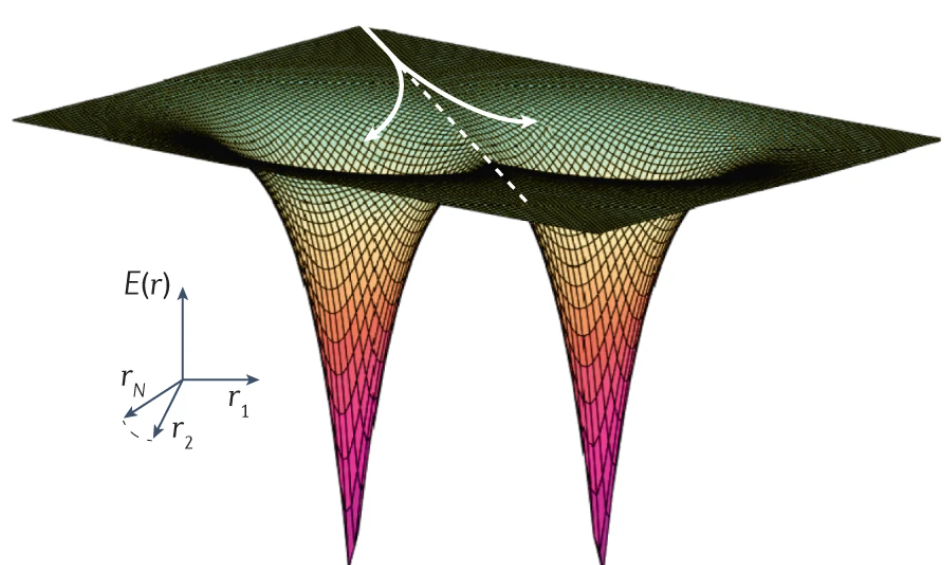  
Khona, M., Fiete, I.R. Nat Rev Neurosci(2022).
---

### Flow Field Example

We can visualize a simple 2D system where each point $(x, y)$ in space has a "flow" direction. This is called a **vector field**, and it’s a key idea in understanding attractor landscapes.


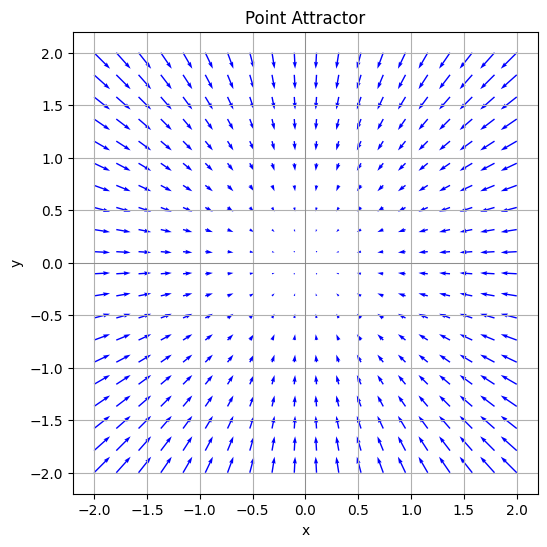

In [5]:
# Define a grid of points
x, y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))

# Flow field (point attractor)
u = -x
v = -y

# Plot
plt.figure(figsize=(6, 6))
plt.quiver(x, y, u, v, color='blue')
plt.title("Point Attractor")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.show()


## Practice: Leaky Integrate-and-Fire Neuron

## Model Introduction

In this example, we’ll simulate how a neuron's membrane potential passively changes over time in response to a brief current input using **Euler’s method**.  

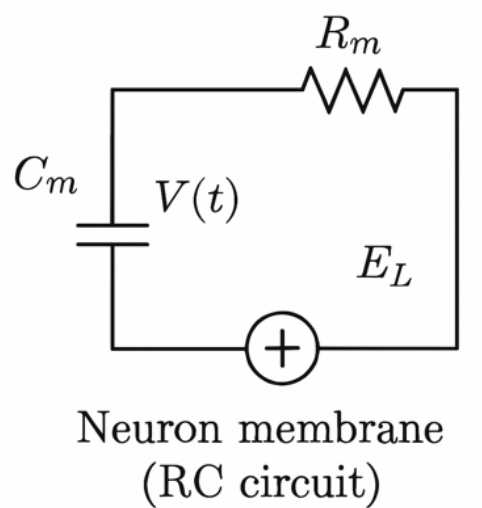  

We will use the **leaky integrate-and-fire (LIF) model**, which describes neuronal membrane as an RC circuit:

$$
C_m \frac{dV}{dt} = -\frac{V - E_L}{R_m} + I(t)
$$

Where:
- $C_m$: membrane capacitance
- $R_m$: membrane resistance
- $E_L$: resting potential (leak reversal)
- $I(t)$: input current (time-dependent)

Using **Euler's method**, we approximate this differential equation over small time steps $\Delta t$:

$$
V_{t+\Delta t} = V_t + \frac{\Delta t}{C_m} \left( -\frac{V_t - E_L}{R_m} + I(t) \right)
$$

---

## For you:

Simulate the change in membrane voltage over time when the neuron receives a **square current pulse** for 100 ms.

---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
C_m = 1e-9      # [F] membrane capacitance
R_m = 100e6     # [Ohm] membrane resistance
E_L = -0.070    # [V] resting potential
V_init = E_L    # initial potential
T = 0.2         # [s] total simulation time (200 ms)
dt = 1e-4       # [s] time step

# Initialize time vector
t = np.arange(0, T, dt)

# Input current: 1 nA from 50 to 150 ms
I = np.zeros_like(t)
I[(t >= 0.05) & (t <= 0.15)] = 1e-9  # [A]

# Initialize voltage array
V =                                        #fill in the missing part
V[0] = 

# Euler integration
for i in range(1, len(t)):
    dV = 
    V[i] = 

# Plot the result
plt.figure(figsize=(10, 4))
plt.plot(t * 1000, V * 1000)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Leaky Integrate-and-Fire: Subthreshold Response')
plt.grid(True)
plt.show()


# !!The following content are fully optional and may help a bit in understanding tomorrow's HHM!!
## Bonus: Ion Movement Across a Membrane
### The Nernst Equation

The **Nernst equation** calculates the **equilibrium potential** $E_{\text{ion}}$ for a specific ion across a membrane:

$$
E_{\text{ion}} = \frac{RT}{zF} \ln \left( \frac{[\text{ion}]_\text{o}}{[\text{ion}]_\text{i}} \right)
$$

Where:

| Symbol | Meaning |
|--------|---------|
| $E_{\text{ion}}$ | Equilibrium potential (in volts) |
| $R$ | Universal gas constant = 8.314 J/mol·K |
| $T$ | Absolute temperature (in Kelvin) |
| $z$ | Charge of the ion (e.g., +1 for K⁺) |
| $F$ | Faraday constant ≈ 96,485 C/mol |
| $[\text{ion}]_\text{o}$ | Extracellular concentration (mM) |
| $[\text{ion}]_\text{i}$ | Intracellular concentration (mM) |

---

### Biological Insight

At $E_{\text{ion}}$, the **chemical gradient** is exactly balanced by the **electrical gradient**, so there's no net ion movement.

- For **K⁺**, $[\text{K}^+]_\text{i} \gg [\text{K}^+]_\text{o} \Rightarrow E_K$ is **negative**
- For **Na⁺**, $[\text{Na}^+]_\text{o} \gg [\text{Na}^+]_\text{i} \Rightarrow E_{Na}$ is **positive**

Neurons have a resting membrane potential near $E_K$ because **K⁺ permeability dominates at rest**.

---

In [ ]:
# Calculate the equilibrium potential for potassium ions using the Nernst equation
# Constants
R = 8.314   # J/(mol·K)
T = 310     # body temperature in K (37°C)
F = 96485   # C/mol
z_K = +1    # charge of potassium ion

# Concentrations (in mM)
K_out = 5.0    # extracellular K⁺
K_in = 140.0   # intracellular K⁺

# Nernst equation (in volts)
E_K = (R * T) / (z_K * F) * np.log(K_out / K_in)

# Convert to millivolts
E_K_mV = E_K * 1000

print(f"Potassium equilibrium potential: {E_K_mV:.2f} mV")


Potassium equilibrium potential: -89.01 mV


The **Nernst–Planck flux equation** in 1D is:

$$
J = -D \frac{dc}{dx} + \frac{zFD}{RT} \cdot c \cdot \frac{d\phi}{dx}
$$

Where:  
- $J$: ion flux (mol / m²·s)  
- $D$: diffusion coefficient of Na⁺  
- $c$: concentration of Na⁺ (mol/m³)  
- $\phi$: electric potential (V)  
- $z$: ion valence (for Na⁺, $z = +1$)  
- $F$: Faraday constant ($\approx 96{,}485$ C/mol)  
- $R$: gas constant ($\approx 8.314$ J/mol·K)  
- $T$: absolute temperature (K)  

---


## Understanding Steady-State Ion Transport

In the derivation of ion flow using the **Nernst–Planck equation**, flux $J$ times $eZ$ gives you current $i$:

$$
i(x) = -u z F \left( \frac{d[C](x)}{dx} + \frac{zF}{RT} [C](x) \cdot \frac{dV(x)}{dx} \right)
$$

Where:

- $u$ = ion mobility  
- $z$ = ion valence  
- $F$ = Faraday constant  
- $R$ = gas constant  
- $T$ = absolute temperature  
- $V(x)$ = electric potential  
- $[C](x)$ = ion concentration as a function of position  

In general, $i(x)$ could vary with $x$.

---

###  Steady-State Assumption

In most physiological conditions (e.g., at constant membrane voltage), we assume **steady state**.  
This means:

- There’s **no net accumulation** of ions in any part of the membrane (range of x).
- Therefore, the **current density $i$ is constant across position** $x$:
  
This is a **critical assumption** that allows us to proceed with solving the differential equation.

---

### Solving for $[C](x)$

Assuming the membrane has a uniform electric field, the potential changes linearly:

$$
\frac{dV(x)}{dx} = \frac{V_M}{l}
$$

So the Nernst–Planck equation becomes:

$$
i = -u z F \left( \frac{d[C](x)}{dx} + \frac{zF}{RT} [C](x) \cdot \frac{V_M}{l} \right)
$$

Let $\alpha = \frac{zF V_M}{RTl}$, then:

$$
\frac{d[C](x)}{dx} + \alpha [C](x) = -\frac{i}{uzF}
$$

This is a linear first-order differential equation.

---
  
To solve this ODE:

1. Multiply both sides by the integrating factor $e^{\alpha x}$:

$$
\frac{d}{dx} \left( [C](x) \cdot e^{\alpha x} \right) = -\frac{i}{u z F} e^{\alpha x}
$$

2. Integrate both sides over the membrane from $x=0$ to $x=l$.

3. Apply boundary conditions:
   - $[C](0)  = [C]_\text{out}$ (extracellular)
   - $[C](l) = [C]_\text{in}$ (intracellular)

You’ll now get an expression for $[C](x)$ **in terms of the constant $i$**.

---


Now if we **plug in both boundary concentrations**, we can solve $i$.

This results in the **Goldman-Hodgkin-Katz (GHK) current equation**, which expresses ion current in terms of concentrations, membrane voltage, and physical constants.

---
